In [59]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [60]:
data = pd.read_csv("crimes_count.csv")
data

,Date,Count,Violent,Arrest,Domestic,ABANDONED BUILDING,APARTMENT,COMMERCIAL / BUSINESS OFFICE,CONVENIENCE STORE,CTA PLATFORM,...,25,26,27,29,28,NA.y,24,76,44,19
0,2010-01-01,74,25,16,16,1,19,2,1,1,...,1,17,23,6,0,0,0,0,0,0
1,2010-01-02,51,17,22,3,0,12,0,0,0,...,5,11,12,5,0,0,0,0,0,0
2,2010-01-03,44,18,15,13,0,16,0,1,0,...,2,17,7,1,1,0,0,0,0,0
3,2010-01-04,52,16,21,5,2,7,0,0,0,...,4,15,13,6,0,1,0,0,0,0
4,2010-01-05,52,13,29,8,2,5,0,0,1,...,3,14,7,10,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5163,2024-02-20,42,16,17,9,0,7,0,1,0,...,5,15,7,2,4,0,0,0,0,0
5164,2024-02-21,35,16,9,8,0,12,2,0,1,...,2,6,10,4,1,0,0,0,0,0
5165,2024-02-22,33,10,16,4,0,6,2,0,0,...,6,9,4,3,1,0,0,0,0,0
5166,2024-02-23,28,6,9,5,1,6,1,0,0,...,2,12,5,2,0,0,0,0,0,0


In [61]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfYear'] = data['Date'].dt.dayofyear
data['WeekOfYear'] = data['Date'].dt.isocalendar().week
data['IsWeekend'] = data['Date'].dt.weekday >= 5

In [62]:
data['Month_Sin'] = np.sin(2 * np.pi * data['Month']/12)
data['Month_Cos'] = np.cos(2 * np.pi * data['Month']/12)
data['Day_Sin'] = np.sin(2 * np.pi * data['Day']/data['Date'].dt.days_in_month)
data['Day_Cos'] = np.cos(2 * np.pi * data['Day']/data['Date'].dt.days_in_month)

In [63]:
numeric_columns = data.select_dtypes(include=['float', 'int']).columns

for column in numeric_columns:
    mean_value = data[column].mean()
    data[column].fillna(mean_value, inplace=True)

In [64]:
data['Date'] =data['Year'] + (data['Month'] - 0.5)/12

In [65]:
train_data = data[data['Year'] <= 2021]
test_data = data[data['Year'] > 2021]

X_train = train_data.drop(columns=['Violent'])
y_train = train_data['Violent']

X_test = test_data.drop(columns=['Violent'])
y_test = test_data['Violent']


In [66]:
rf_reg = RandomForestRegressor(n_estimators=200, random_state=42)  # 100 trees, random state for reproducibility
rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [67]:
y_test_pred = rf_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)
r2 = r2_score(y_test, y_test_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 2.5039554140127387
Mean Squared Error: 9.678103789808917
Root Mean Squared Error: 3.1109650897766303
R-squared: 0.5048534634767867


In [68]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming X_train, y_train, X_test, y_test are already defined

# Define base learners
base_learners = [
    ('rf', RandomForestRegressor(n_estimators=200, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
]

# Define meta-learner
meta_learner = LinearRegression()

# Define stacking ensemble model
stacked_model = StackingRegressor(estimators=base_learners, final_estimator=meta_learner, cv=10)

# Fit the model
stacked_model.fit(X_train, y_train)

# Make predictions
y_test_pred = stacked_model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_test_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 2.443914614156216
Mean Squared Error: 9.315072798609147
Root Mean Squared Error: 3.0520604185712226
R-squared: 0.5234266821410086


/var/folders/dg/vmt5dhqd63v3mly_f417j7340000gn/T/ipykernel_7513/3802353712.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_Violent'] = y_test_pred


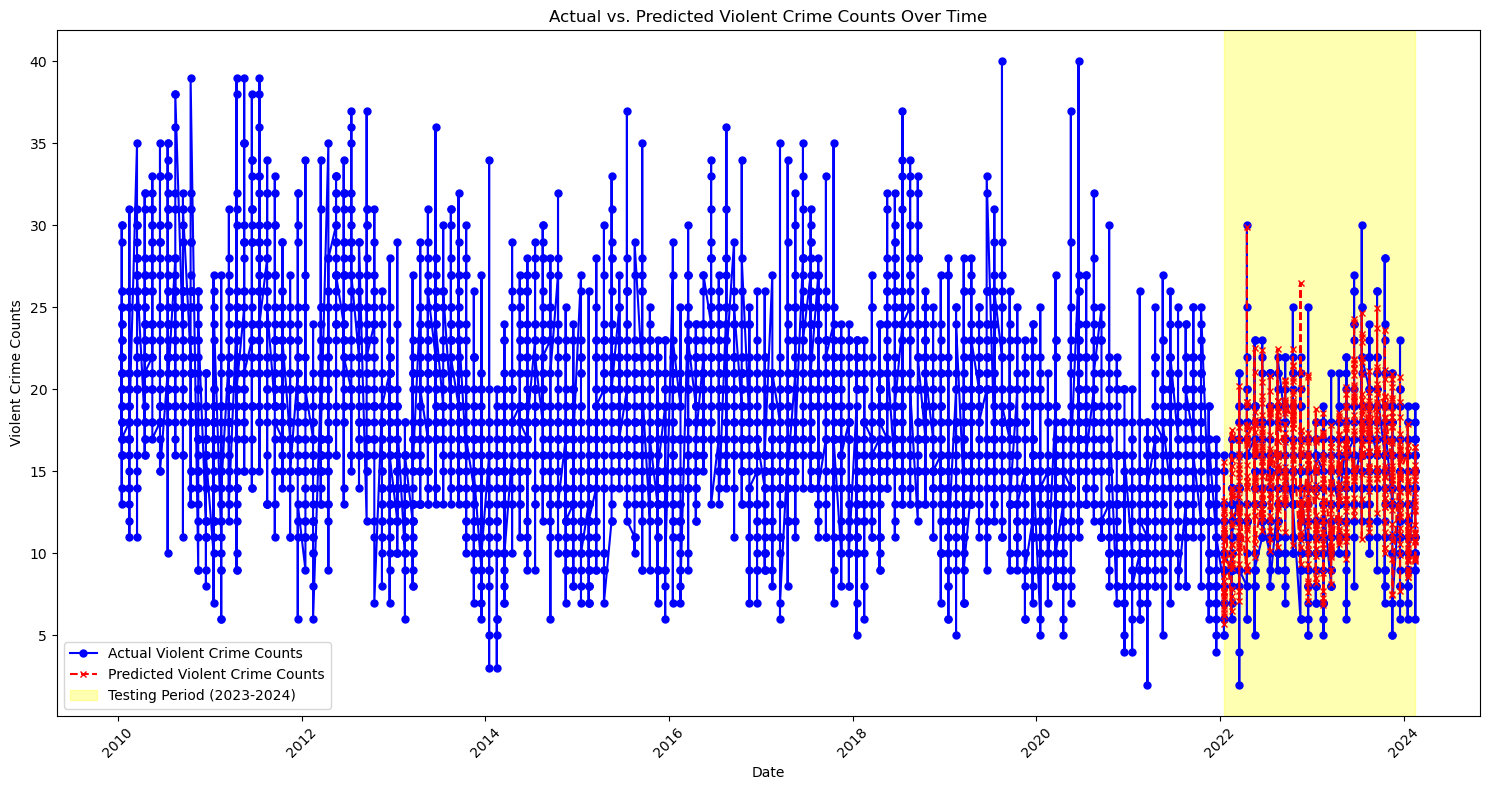

In [69]:
import matplotlib.pyplot as plt

test_data['Predicted_Violent'] = y_test_pred

# Combine training and testing data back into a single DataFrame for plotting
full_data = pd.concat([train_data, test_data])

# Sorting may not be necessary if your DataFrame is already in date order, but it's a good practice
full_data_sorted = full_data.sort_values(by='Date')

# Plotting
plt.figure(figsize=(15, 8))
plt.plot(full_data_sorted['Date'], full_data_sorted['Violent'], label='Actual Violent Crime Counts', color='blue', marker='o', linestyle='-', markersize=5)
plt.plot(full_data_sorted['Date'], full_data_sorted['Predicted_Violent'], label='Predicted Violent Crime Counts', color='red', marker='x', linestyle='--', markersize=5)

# Highlighting the testing period
plt.axvspan(test_data['Date'].min(), test_data['Date'].max(), color='yellow', alpha=0.3, label='Testing Period (2023-2024)')

plt.title('Actual vs. Predicted Violent Crime Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Violent Crime Counts')
plt.legend()

# Setting x-axis tick frequency for better detail
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(prune='lower')) # Adjust frequency according to your preference

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
